# Explanatory FordGo Bike


## Investigation Overview

> I am interested in analyzing the following points:
 - The counting of bike trips during the year; 
 - The average trip duration;
 - The time of the day, the day of the week, the month of the year that concentrate the most bicycle trips;
 - The user type influences the duration of the trip and the day of the trip.

## Dataset Overview

> This dataset consists of information regarding 2,5 Millions of bike trips during 
the 2019 year in San Francisco. Some columns like start_time, duration_sec, user_type, 
bike_id deserve a special attention in data analysis.

In [1]:
!pip install -U seaborn 

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Reading the bike_df_master.csv file
df = pd.read_csv("201904-fordgobike-tripdata.csv")

In [4]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No
6,920,2019-04-30 23:57:56.3400,2019-05-01 00:13:16.4540,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes
7,725,2019-04-30 23:56:11.2190,2019-05-01 00:08:16.9150,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No
8,488,2019-04-30 23:59:00.6600,2019-05-01 00:07:08.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No
9,792,2019-04-30 23:53:37.6040,2019-05-01 00:06:50.4050,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No


In [5]:
df.shape

(239111, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
member_birth_year          227912 non-null float64
member_gender              227912 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 29.2+ MB


In [7]:
# checking for the NAN values 
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [8]:
#checking for any duplicated rows 
df.duplicated().sum()

0

### cleaning the data


In [9]:
# copy of data frame 
df2 = df

In [10]:
# rid off the NAN Values 
df2 = df2.dropna()
# Testing 
df2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# changing the birth_year to int 
df2.member_birth_year = df2.member_birth_year.astype(int)

In [12]:
# changing the start_time and end_time to date instead of integer 
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)

In [13]:
#testing of previous changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 16 columns):
duration_sec               227848 non-null int64
start_time                 227848 non-null datetime64[ns]
end_time                   227848 non-null datetime64[ns]
start_station_id           227848 non-null float64
start_station_name         227848 non-null object
start_station_latitude     227848 non-null float64
start_station_longitude    227848 non-null float64
end_station_id             227848 non-null float64
end_station_name           227848 non-null object
end_station_latitude       227848 non-null float64
end_station_longitude      227848 non-null float64
bike_id                    227848 non-null int64
user_type                  227848 non-null object
member_birth_year          227848 non-null int64
member_gender              227848 non-null object
bike_share_for_all_trip    227848 non-null object
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

Now we did the cleaning phase we can continue with the analysis 

# Univariate Exploration


In [14]:
df2['day'] = df2.start_time.dt.dayofweek

In [15]:
df2.day.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

In [16]:
def xyt(xlab,ylab,tit) :
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit)
    plt.show()

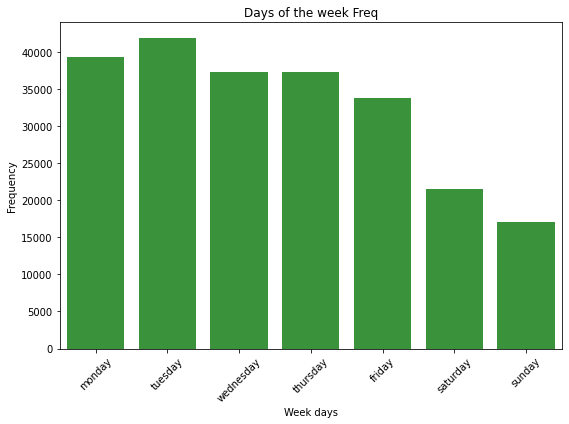

In [17]:
plt.rcParams["figure.figsize"] = 9,6
order_days =  ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
base_color = sb.color_palette()[2]
sb.countplot( data = df2 , x = "day" ,color=base_color, order=order_days)
plt.xticks(rotation= 45)
xyt('Week days','Frequency',"Days of the week Freq")

We can see that there is a big change on Satuerday and sunday.
that could indicate that the usage of bikes as a transport to work during work days is a factor.

In [18]:
df2["duration_in_Minute"] = round(df2.duration_sec/60,2)

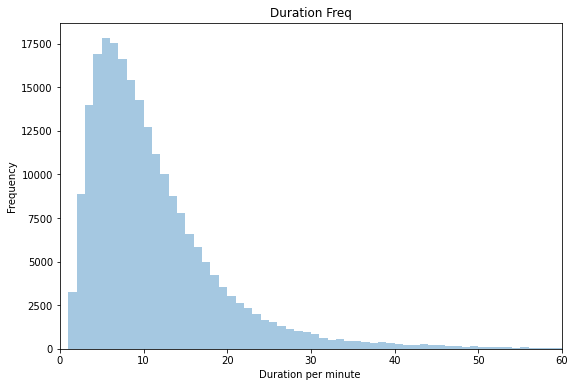

In [19]:
ticks = list(range(61))
bins = np.arange(0,df2.duration_in_Minute.max()+10)
sb.distplot(df2.duration_in_Minute, bins = bins , kde=False);
plt.xlim((1,50));
plt.xticks(ticks[::10])
xyt('Duration per minute ','Frequency',"Duration Freq")

In [20]:
#add column for the age of users by extracting the today date .
from datetime import datetime, date
today = date.today() 
df2["member_age"] = today.year - df2.member_birth_year

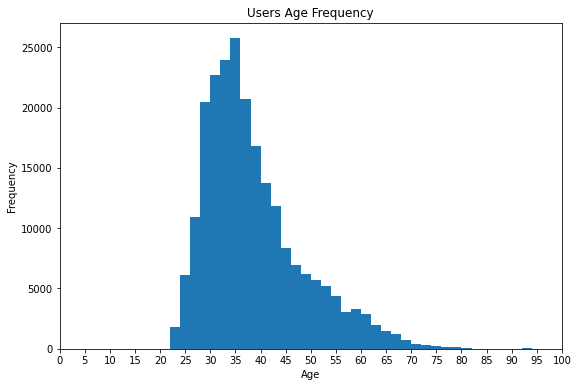

In [21]:
#plotting the frequency ages of the users 
ticks = list(range(101))
bins = np.arange(0,df2.duration_in_Minute.max()+5,2)
plt.hist(df2.member_age , bins = bins)
plt.xlim((0,100));
plt.xticks(ticks[::5])
xyt('Age','Frequency',"Users Age Frequency")

Useres of the ages betwen 20's and 30's has the highest share.

In [22]:
#counting the values of member_gender column 
gender_count = df2.member_gender.value_counts()
gender_count

Male      168093
Female     55484
Other       4271
Name: member_gender, dtype: int64

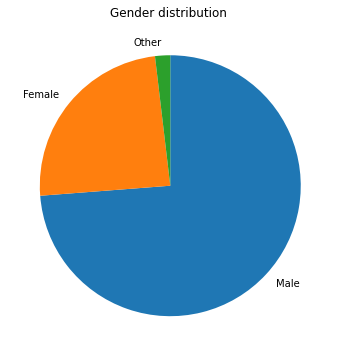

In [23]:
#Plotting Pie chart for Gender_members distribution 
plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False);
plt.title("Gender distribution ") 
plt.show()

Males has the highest share of the population 

# Bivariate Exploration


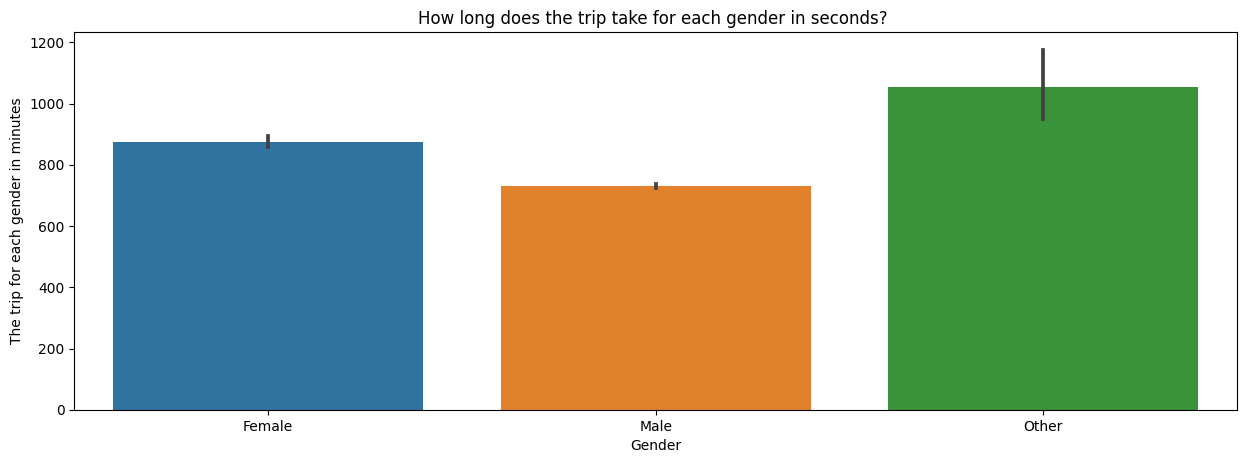

In [24]:
# ------------------------Duration distribution by member gender

plt.figure(figsize = (15,5), dpi = 100)

sb.barplot(data = df, x = "member_gender", y = "duration_sec")

plt.xlabel('Gender')

plt.ylabel('The trip for each gender in minutes')


plt.title("How long does the trip take for each gender in seconds? ")

plt.show()

Males have a shorter trip.

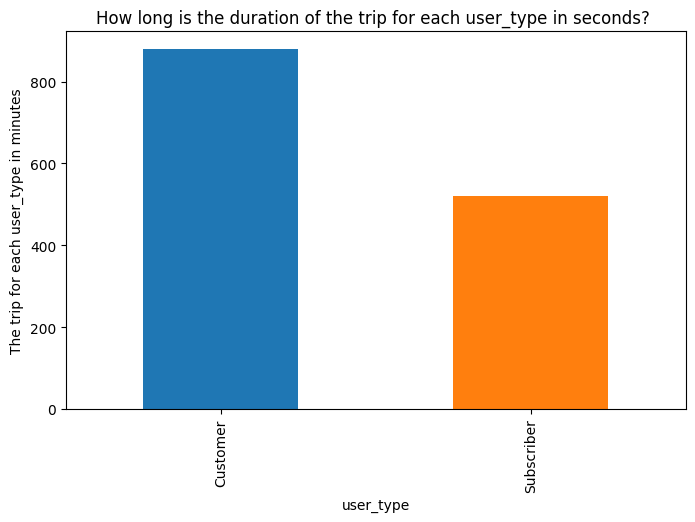

In [25]:
plt.figure(figsize = (8,5), dpi = 100)

df.groupby('user_type')['duration_sec'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('user_type')

plt.ylabel('The trip for each user_type in minutes')


plt.title("How long is the duration of the trip for each user_type in seconds? ")

plt.show()

The user type Customers travels further than the user type Subscribers.

# Multivariate Exploration

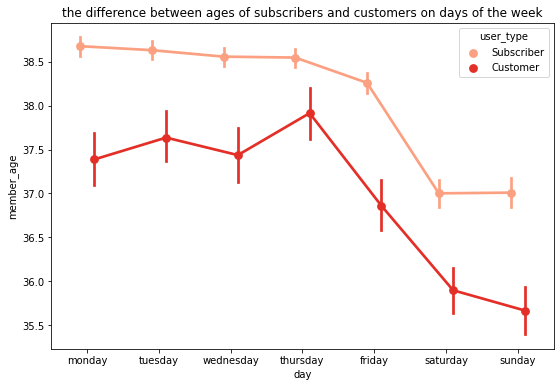

In [26]:
sb.pointplot(data = df2 , x = 'day', y = 'member_age', hue = "user_type",palette = 'Reds', dodge = 0.2 , order = order_days)
plt.title("the difference between ages of subscribers and customers on days of the week")
plt.show()

It demonstrates that the average ages of casual customers are lower than the average ages of subscribers. It also demonstrates that the average age of both users types is lower on weekends.

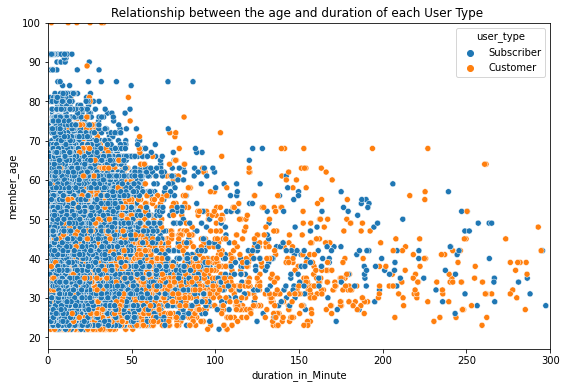

In [29]:
#plotting Relationship the age & duration per each User_Type 
sb.scatterplot(data = df2, x = df2.duration_in_Minute , y =df2.member_age , hue ='user_type',palette = "tab10")
plt.ylim((17,100))
plt.xlim((0,300))
plt.title("Relationship between the age and duration of each User Type ")
plt.show()

The graph depicts the negative relationship between member ages and duration, which is clustered by user type, whether subscribers or casual users. It demonstrates that the duration of casual users is longer than that of subscribers, and there is no significant difference in their ages.

##### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


the distribution of the duration of the subscribers is uniform during the different days . unlike the casual clients Their average is increasing in the weekends days . Also theaverages of the casual customers are less than the average of subscribers ages . It showes also that the average of the age of the both users type is less in weekends


#### Were there any interesting or surprising interactions between features?


the average of duration of casual users was heigher the weekends days than the rest of the days unlike the subscribers the duration distribution is uniforme even in the weekdays . that was intersting .